In [2]:
import pickle
import numpy as np

# 피클 파일 경로
cbct_13_path = '/content/drive/MyDrive/TMJ OA/기존 CBCT 1,3 + NEW CBCT 1,2/tmj_oa_CBCT1,3 + NEW_dataset.pkl'
cbct_24_path = '/content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4/tmj_oa_CBCT2,4 + NEW_dataset.pkl'

# 피클 파일 로드
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# 두 피클 데이터 로드
cbct_13_data = load_pickle(cbct_13_path)
cbct_24_data = load_pickle(cbct_24_path)

# 데이터 비교
def compare_datasets(data1, data2):
    # 주요 키 비교
    keys1 = set(data1.keys())
    keys2 = set(data2.keys())
    print("Keys in CBCT 1,3 but not in CBCT 2,4:", keys1 - keys2)
    print("Keys in CBCT 2,4 but not in CBCT 1,3:", keys2 - keys1)

    # 데이터셋 구조 및 크기 비교
    for key in keys1.intersection(keys2):
        print(f"\nComparing key: {key}")
        sub_keys1 = set(data1[key].keys())
        sub_keys2 = set(data2[key].keys())
        print(f"  Subkeys in CBCT 1,3 but not in CBCT 2,4: {sub_keys1 - sub_keys2}")
        print(f"  Subkeys in CBCT 2,4 but not in CBCT 1,3: {sub_keys2 - sub_keys1}")

        for sub_key in sub_keys1.intersection(sub_keys2):
            print(f"    Subkey: {sub_key}")
            if isinstance(data1[key][sub_key], list) or isinstance(data1[key][sub_key], np.ndarray):
                print(f"      CBCT 1,3 size: {len(data1[key][sub_key])}")
                print(f"      CBCT 2,4 size: {len(data2[key][sub_key])}")
            else:
                print(f"      CBCT 1,3 value: {data1[key][sub_key]}")
                print(f"      CBCT 2,4 value: {data2[key][sub_key]}")

# 데이터 비교 수행
compare_datasets(cbct_13_data, cbct_24_data)

Keys in CBCT 1,3 but not in CBCT 2,4: set()
Keys in CBCT 2,4 but not in CBCT 1,3: set()

Comparing key: validation_data
  Subkeys in CBCT 1,3 but not in CBCT 2,4: set()
  Subkeys in CBCT 2,4 but not in CBCT 1,3: set()
    Subkey: image
      CBCT 1,3 size: 550
      CBCT 2,4 size: 550
    Subkey: label
      CBCT 1,3 size: 550
      CBCT 2,4 size: 550
    Subkey: patient_id
      CBCT 1,3 size: 550
      CBCT 2,4 size: 550
    Subkey: side
      CBCT 1,3 size: 550
      CBCT 2,4 size: 550

Comparing key: train_data
  Subkeys in CBCT 1,3 but not in CBCT 2,4: set()
  Subkeys in CBCT 2,4 but not in CBCT 1,3: set()
    Subkey: image
      CBCT 1,3 size: 1645
      CBCT 2,4 size: 1646
    Subkey: label
      CBCT 1,3 size: 1645
      CBCT 2,4 size: 1646
    Subkey: patient_id
      CBCT 1,3 size: 1645
      CBCT 2,4 size: 1646
    Subkey: side
      CBCT 1,3 size: 1645
      CBCT 2,4 size: 1646

Comparing key: test_data
  Subkeys in CBCT 1,3 but not in CBCT 2,4: set()
  Subkeys in CBCT 2,4 

In [3]:
# Patient ID 비교
cbct_13_ids = set(cbct_13_data['train_data']['patient_id'])
cbct_24_ids = set(cbct_24_data['train_data']['patient_id'])

# ID 차이 확인
print("Patient IDs in CBCT 1,3 but not in CBCT 2,4:", cbct_13_ids - cbct_24_ids)
print("Patient IDs in CBCT 2,4 but not in CBCT 1,3:", cbct_24_ids - cbct_13_ids)

Patient IDs in CBCT 1,3 but not in CBCT 2,4: {'20681941', '20660725', '20624307', '14961081', '20680922', '11718100', '20700413', '20693689', '20696432', '20669749', '20673412', '20709114', '11791112', '20690233', '20705536', '15001421', '10428043', '20686742', '14976383', '12159868', '20600041', '20681318', '20706296', '20693428', '20695175', '12702167', '20693183', '20685607', '20698452', '14954077', '20648070', '20682068', '20450794', '20658694', '14984283', '20702425', '20707952', '14741005', '20658194', '20593705', '20691103', '14937674', '14986052', '20670516', '11252009', '12808917', '20699850', '20587507', '20688866', '20662170', '12023769', '20660227', '20693205', '20645587', '20541261', '20673144', '20689901', '20699490', '12555043', '20665786', '14966246', '20690566', '12726097', '20680911', '14558072', '14964972', '20696087', '14521382', '20303046', '14999373', '20701179', '20670237', '20666020', '14946601', '20621498', '20639231', '20677990', '20699451', '20685588', '14981

In [4]:
# 병합을 위한 공통 키 확인
merged_data = {'train_data': {}, 'validation_data': {}, 'test_data': {}}

for key in merged_data.keys():
    merged_data[key]['image'] = np.concatenate((cbct_13_data[key]['image'], cbct_24_data[key]['image']))
    merged_data[key]['label'] = np.concatenate((cbct_13_data[key]['label'], cbct_24_data[key]['label']))
    merged_data[key]['side'] = np.concatenate((cbct_13_data[key]['side'], cbct_24_data[key]['side']))
    merged_data[key]['patient_id'] = np.concatenate((cbct_13_data[key]['patient_id'], cbct_24_data[key]['patient_id']))

print("Merged data shapes:")
for key in merged_data.keys():
    print(f"{key}: {len(merged_data[key]['image'])} images")

Merged data shapes:
train_data: 3291 images
validation_data: 1100 images
test_data: 1101 images


In [5]:
# 피클 파일 로드
with open('/content/drive/MyDrive/TMJ OA/기존 CBCT 1,3 + NEW CBCT 1,2/tmj_oa_CBCT1,3 + NEW_dataset.pkl', 'rb') as f1:
    cbct_13_data = pickle.load(f1)

with open('/content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4/tmj_oa_CBCT2,4 + NEW_dataset.pkl', 'rb') as f2:
    cbct_24_data = pickle.load(f2)

# 데이터 병합
merged_data = {}

for key in cbct_13_data.keys():  # train_data, validation_data, test_data
    merged_data[key] = {}
    for subkey in cbct_13_data[key].keys():  # image, label, patient_id, side
        if isinstance(cbct_13_data[key][subkey], np.ndarray):
            # 배열 데이터 병합
            merged_data[key][subkey] = np.concatenate([cbct_13_data[key][subkey], cbct_24_data[key][subkey]])
        else:
            # 리스트 데이터 병합
            merged_data[key][subkey] = cbct_13_data[key][subkey] + cbct_24_data[key][subkey]

# 병합된 데이터 정보 출력
for key, value in merged_data.items():
    print(f"{key}:")
    for subkey, subvalue in value.items():
        print(f"  {subkey} - Size: {len(subvalue)}")

# 병합된 데이터를 새 피클 파일로 저장
output_path = '/content/drive/MyDrive/TMJ OA/NEW_CBCT1,2,3,4_Merged_dataset.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(merged_data, f)

print(f"CBCT 1,3 and 2,4 datasets merged and saved to {output_path}")

train_data:
  image - Size: 3291
  patient_id - Size: 3291
  side - Size: 3291
  label - Size: 3291
validation_data:
  image - Size: 1100
  patient_id - Size: 1100
  side - Size: 1100
  label - Size: 1100
test_data:
  image - Size: 1101
  patient_id - Size: 1101
  side - Size: 1101
  label - Size: 1101
CBCT 1,3 and 2,4 datasets merged and saved to /content/drive/MyDrive/TMJ OA/NEW_CBCT1,2,3,4_Merged_dataset.pkl


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 59s 389ms/step - accuracy: 0.5425 - auc: 0.5701 - loss: 0.7744 - val_accuracy: 0.4073 - val_auc: 0.6769 - val_loss: 1.9397 - learning_rate: 1.0000e-04
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.6211 - auc: 0.6647 - loss: 0.6707 - val_accuracy: 0.5927 - val_auc: 0.5608 - val_loss: 2.5600 - learning_rate: 1.0000e-04
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.6470 - auc: 0.6983 - loss: 0.6517 - val_accuracy: 0.4073 - val_auc: 0.5066 - val_loss: 4.9973 - learning_rate: 1.0000e-04
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.6797 - auc: 0.7304 - loss: 0.6280 - val_accuracy: 0.5927 - val_auc: 0.7434 - val_loss: 1.3836 - learning_rate: 5.0000e-05
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 183ms/step - accuracy: 0.7004 - auc: 0.7735 - loss: 0.5784 - val_accuracy: 0.5927 - val_auc: 0.7608 - val_loss: 1.6135 - learning_rate: 5.000

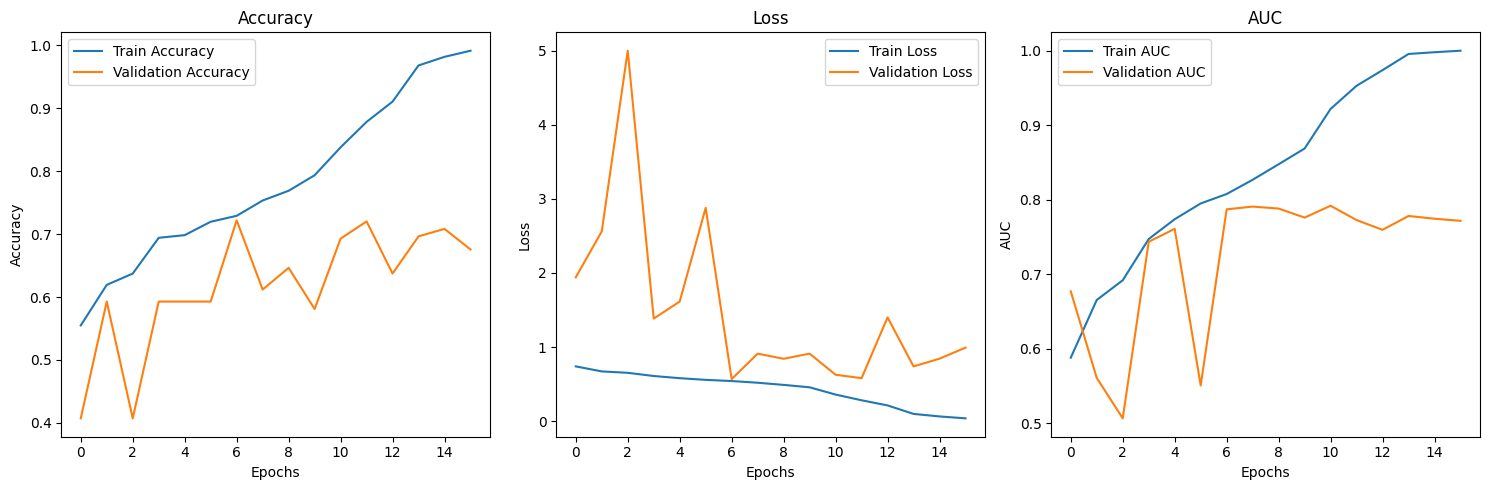

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.6174 - auc: 0.6836 - loss: 0.7769
Model - Loss: 0.6819, Accuracy: 0.6685, AUC: 0.7583
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step
Optimal Threshold: 0.6777


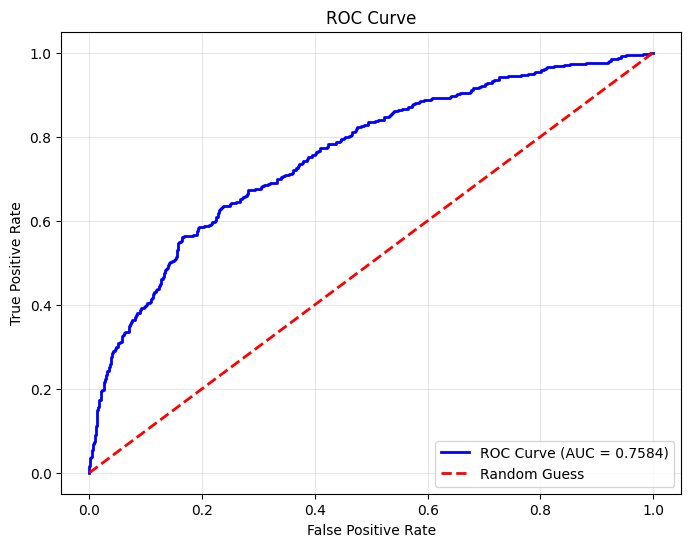

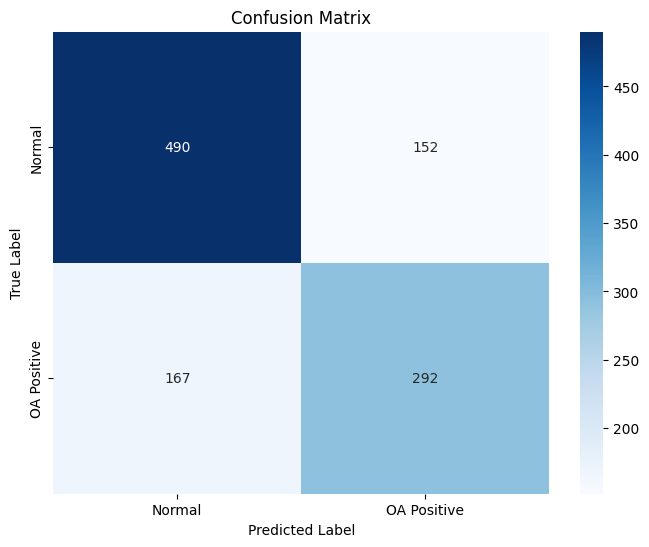

Confusion Matrix:
 [[490 152]
 [167 292]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       642
           1       0.66      0.64      0.65       459

    accuracy                           0.71      1101
   macro avg       0.70      0.70      0.70      1101
weighted avg       0.71      0.71      0.71      1101



In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from tensorflow.image import resize

# 병합된 피클 파일 로드
with open('/content/drive/MyDrive/TMJ OA/NEW_CBCT1,2,3,4_Merged_dataset.pkl', 'rb') as f:
    merged_data = pickle.load(f)

# 병합된 데이터 불러오기
train_images = merged_data['train_data']['image']
train_labels = merged_data['train_data']['label']
val_images = merged_data['validation_data']['image']
val_labels = merged_data['validation_data']['label']
test_images = merged_data['test_data']['image']
test_labels = merged_data['test_data']['label']

# 데이터 증강 생성기 설정
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect'
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)


# 데이터 스케일링
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# VGG16 모델 구성
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(140, 140, 3))
for layer in base_model.layers[:-12]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# 클래스 가중치 계산
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('merged_model.keras', save_best_only=True, monitor='val_auc', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, mode='max', min_lr=1e-6)

# 모델 학습
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=30,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# 학습 결과 시각화
plt.figure(figsize=(15, 5))

# 정확도
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# AUC
plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# 테스트 데이터 평가
test_loss, test_accuracy, test_auc = model.evaluate(test_images, test_labels)
print(f"Model - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, AUC: {test_auc:.4f}")

# ROC Curve
y_pred = model.predict(test_images).flatten()
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix
y_pred_adjusted = (y_pred >= optimal_threshold).astype(int)
#y_pred_adjusted = (y_pred >= 0.4).astype(int)  # 임계값을 약간 높임
conf_matrix = confusion_matrix(test_labels, y_pred_adjusted)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "OA Positive"], yticklabels=["Normal", "OA Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(test_labels, y_pred_adjusted))